In [3]:
import os
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
iris = sns.load_dataset("iris")
iris.head()
iris.shape

(150, 5)

In [46]:
## Summary statistic
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


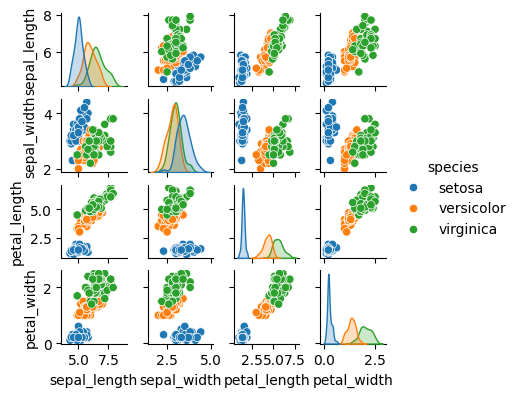

In [49]:
##Visualization(시각화)
sns.pairplot(iris, hue = "species", height = 1)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

In [70]:
X = iris.loc[:, :"petal_width"]
y = iris["species"]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.2, stratify=y)
print("train_X shape = ", train_X.shape)
print("test_X shape = ", test_X.shape)

train_X shape =  (120, 4)
test_X shape =  (30, 4)


In [81]:
from sklearn.preprocessing import StandardScaler

In [79]:
## Scaling
mean = train_X.mean()
std = train_X.std()

train_scaled = (train_X - mean) / std
test_scaled = (test_X - mean) / std
print(train_scaled)
print(test_scaled)

     sepal_length  sepal_width  petal_length  petal_width
76       1.191037    -0.573025      0.607599     0.270302
53      -0.386228    -1.703995      0.152256     0.137367
65       1.069709     0.105557      0.379927     0.270302
45      -1.235524    -0.120637     -1.327611    -1.191989
56       0.584397     0.557945      0.550681     0.536173
..            ...          ...           ...          ...
147      0.827053    -0.120637      0.835271     1.067916
146      0.584397    -1.251607      0.721435     0.934980
68       0.463069    -1.930189      0.436845     0.403238
110      0.827053     0.331751      0.778353     1.067916
13      -1.842164    -0.120637     -1.498365    -1.457860

[120 rows x 4 columns]
     sepal_length  sepal_width  petal_length  petal_width
52       1.312365     0.105557      0.664517     0.403238
7       -0.992868     0.784139     -1.270693    -1.324925
73       0.341741    -0.573025      0.550681     0.004431
126      0.463069    -0.573025      0.607599    

훈련 데이터 차원: (120, 4)
훈련 레이블 차원: (120,)
테스트 데이터 차원: (30, 4)
테스트 레이블 차원: (30,)


In [72]:
knn = KNeighborsClassifier()

knn.fit(train_scaled, train_y)
print("train ACC", knn.score(train_scaled, train_y))
print("test ACC", knn.score(test_scaled, test_y))

train ACC 0.9583333333333334
test ACC 0.9666666666666667


In [77]:
print("classes = ", knn.classes_)
print("feature names = ", knn.feature_names_in_)
print("matric = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)
print("k = ", knn.n_neighbors)

classes =  ['setosa' 'versicolor' 'virginica']
feature names =  ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
matric =  euclidean
samples =  120
k =  5


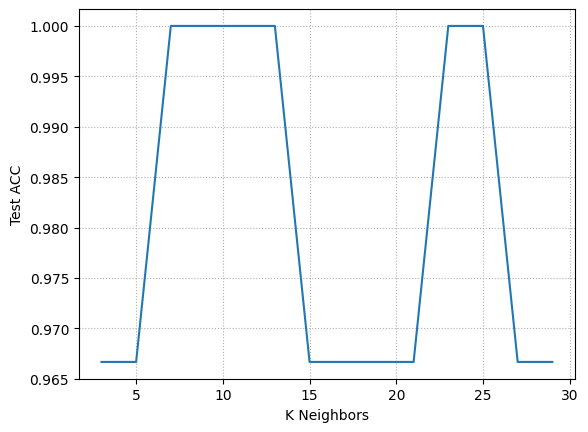

In [78]:
knn = KNeighborsClassifier()
score_list = []
n_list = []

for n in range(3, 30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)
        
plt.plot(n_list, score_list)
plt.grid(linestyle = ":")
plt.xlabel("K Neighbors")
plt.ylabel("Test ACC")
plt.show()